In [57]:
import reeds
import pygromos

import glob
import os
import numpy as np
import matplotlib.pyplot as plt

from reeds.function_libs.file_management import file_management as fM
from reeds.function_libs.analysis import sampling as sampling_ana

from pygromos.files.imd import Imd

In [58]:
def get_maxContribSampling(path_imd, path_energies, prefix_energies):

    trajs = fM.parse_csv_energy_trajectories(in_folder=path_energies, ene_trajs_prefix=prefix_energies)
    
    print (f'we found n = {len(trajs)} trajectories')
    
    imd = Imd(path_imd)
    

    num_seeds = len(trajs)
    num_states = int(imd.REPLICA_EDS.NUMSTATES)
    eoffs = np.array(imd.REPLICA_EDS.EIR, dtype=float).T[0]
    s_vals =  np.array(imd.REPLICA_EDS.RES, dtype=float)

    thres = np.zeros(num_states)

    # Perform the sampling analysis
    (sampling_results, out_dir) = sampling_ana.sampling_analysis(out_path=dat_path + '/tmp',
                                                                 ene_trajs=trajs,
                                                                 eoffs=eoffs,
                                                                 s_values=s_vals,
                                                                 state_potential_treshold=thres, 
                                                                 _visualize = False)

    # convert to numpy array to simplyfy working with it
    maxContrib = [] 

    for i in range(num_seeds):
        maxContrib.append(list(sampling_results['samplingDistributions'][i+1]['max_contributing_state'].values()))

    maxContrib = np.array(maxContrib)
    
    return maxContrib

# Load the data (production run) from the approppriate directory! Here example is shown for CHK1 datasets, but paths could be adapted for any other dataset

In [59]:
os.getcwd()

'/fileserver/pine/pine2/cchampion/REEDS/2_protonation/paper_programs/notebooks'

In [60]:
dat_path = f'{os.getcwd()}/../data/GSK3b'

# Read the imd for some extra info here: 

openff_prot = get_maxContribSampling(path_imd = f'{dat_path}/complex/ene_s1/repex_prod.imd', 
                                   path_energies = f'{dat_path}/complex/ene_s1/', 
                                   prefix_energies = "GSK3b_complex_sharedR_production_energies")

openff_wat = get_maxContribSampling(path_imd = f'{dat_path}/ligands/ene_s1/repex_prod.imd', 
                                  path_energies = f'{dat_path}/ligands/ene_s1', 
                                  prefix_energies = "GSK3b_sharedR_prod")

we found n = 5 trajectories
we found n = 5 trajectories


# Plot the data
note: formatting options usually need to be changed for each system

/tmp/ipykernel_238323/593366079.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


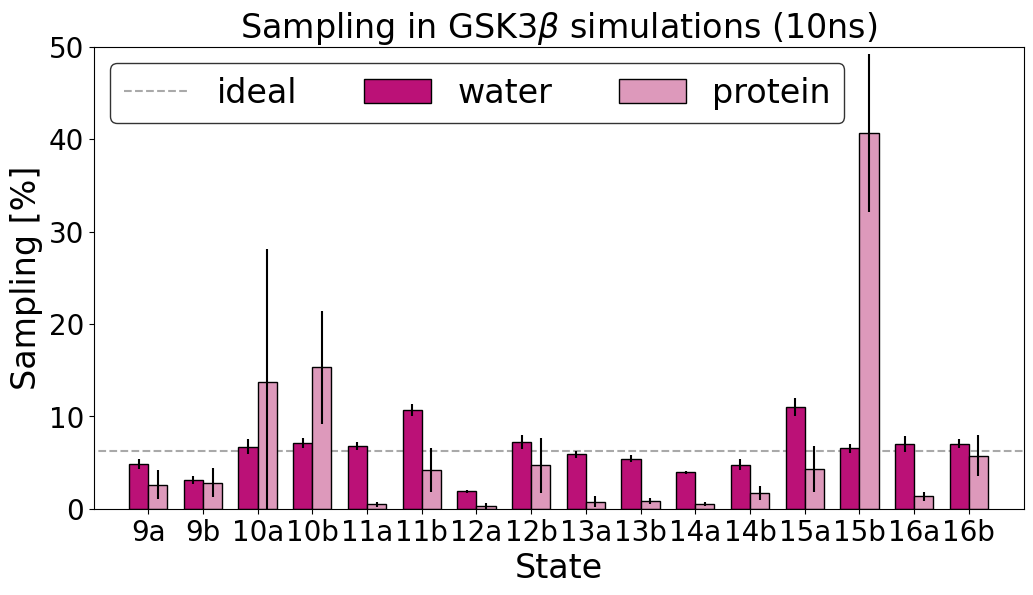

In [61]:
fig = plt.figure(constrained_layout=True, figsize = [12, 6])
axd = fig.subplot_mosaic( """
    A
    """, gridspec_kw={"wspace": 0.05,})


labels = []
for i in range(9, 17):
    labels.append(f'{str(i)}a')
    labels.append(f'{str(i)}b')

num_states = len(openff_prot[0])
x = np.arange(num_states)
width = 0.35

ax = axd['A']

ax.set_xlim( -1, num_states)

ax.set_xticks(x)
ax.set_xticklabels(x+1)
ax.set_xlabel('State', fontsize = 24)

ax.set_ylabel('Sampling [%]', fontsize = 24)

ax.bar(x - width/2, 100* np.average(openff_wat, axis=0), yerr=100* np.std(openff_wat, axis=0), 
      width = width, color = '#bb1177', edgecolor = 'black', label = 'water', zorder = 2)

ax.bar(x + width/2, 100* np.average(openff_prot, axis=0), yerr=100* np.std(openff_prot, axis=0), 
       width = width, color = '#dd99bb',  edgecolor = 'black', label = 'protein', zorder = 2)


# ax.boxplot(openff_prot * 100)


ax.hlines(y = 100/ num_states, xmin= - 100, xmax = 100, label = 'ideal', color = 'darkgrey', ls = '--', zorder = 1)

ax.set_ylim([0, 50])

ax.legend(loc = 'upper left', fontsize = 24, edgecolor = 'black', fancybox = True, ncols = 3)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_title(r'Sampling in GSK3$\beta$ simulations (10ns)', fontsize = 24)

ax.set_xticklabels(labels)
fig.tight_layout()

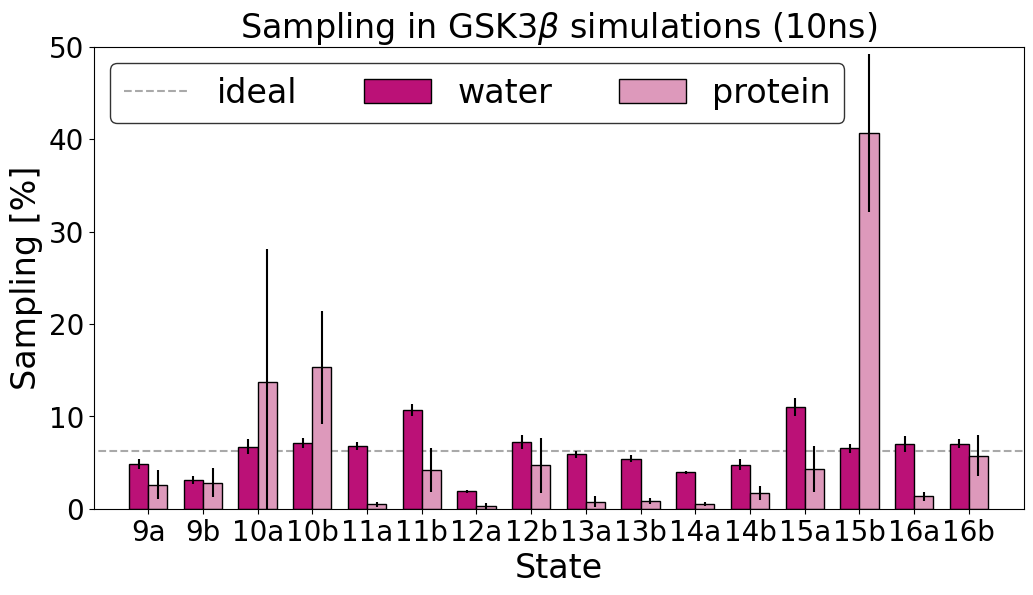

In [62]:
fig

In [63]:
fig.savefig('//home/cchampion/Desktop/GSK3b_sampling.png', 
            dpi = 300, facecolor = 'white', bbox_inches='tight')

# Same thing for FXa

In [46]:
dat_path = f'{os.getcwd()}/../data/FXA'

# Read the imd for some extra info here: 

openff_prot = get_maxContribSampling(path_imd = f'{dat_path}/complex/ene_s1/repex_prod.imd', 
                                   path_energies = f'{dat_path}/complex/ene_s1/', 
                                   prefix_energies = "FXA_complex_production_energies")

openff_wat = get_maxContribSampling(path_imd = f'{dat_path}/ligands/ene_s1/repex_prod.imd', 
                                  path_energies = f'{dat_path}/ligands/ene_s1', 
                                  prefix_energies = "FXA_ligands_production_energies")

we found n = 5 trajectories
we found n = 5 trajectories


[Text(0, 0, '1a'),
 Text(1, 0, '1b'),
 Text(2, 0, '2a'),
 Text(3, 0, '2b'),
 Text(4, 0, '3a'),
 Text(5, 0, '3b'),
 Text(6, 0, '4a'),
 Text(7, 0, '4b'),
 Text(8, 0, '5a'),
 Text(9, 0, '5b'),
 Text(10, 0, '6a'),
 Text(11, 0, '6b'),
 Text(12, 0, '7a'),
 Text(13, 0, '7b'),
 Text(14, 0, '8a'),
 Text(15, 0, '8b')]

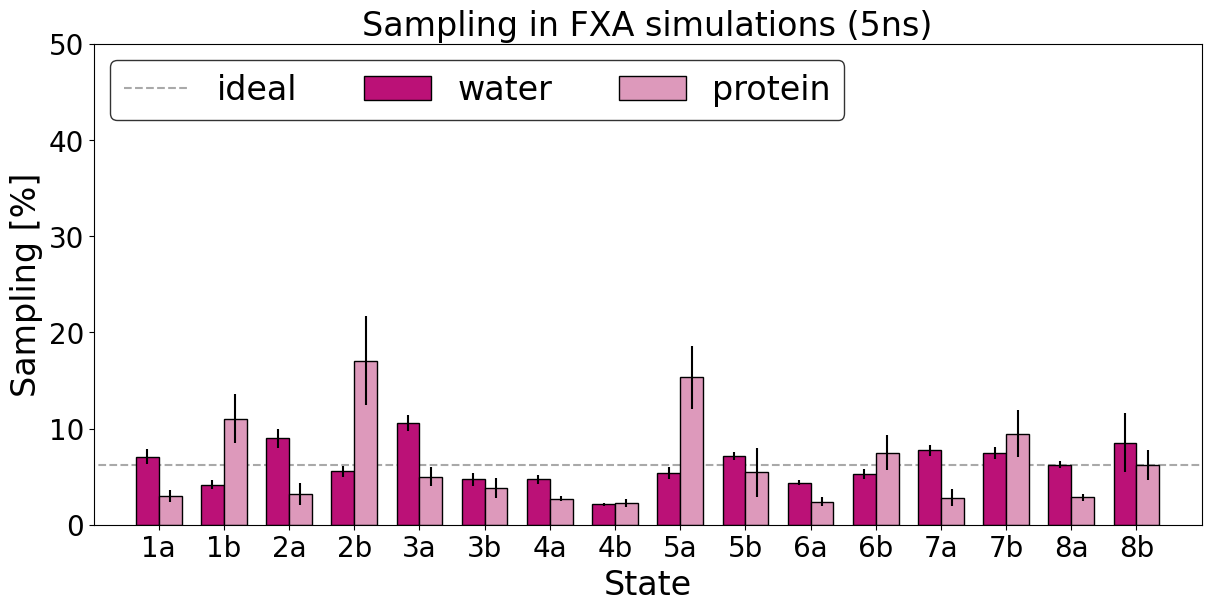

In [47]:
fig = plt.figure(constrained_layout=True, figsize = [12, 6])
axd = fig.subplot_mosaic( """
    A
    """, gridspec_kw={"wspace": 0.05,})

labels = []
for i in range(1, 9):
    labels.append(f'{str(i)}a')
    labels.append(f'{str(i)}b')
    
    num_states = len(openff_prot[0])
x = np.arange(num_states)
width = 0.35

ax = axd['A']

ax.set_xlim( -1, num_states)

ax.set_xticks(x)
ax.set_xticklabels(x+1)
ax.set_xlabel('State', fontsize = 24)

ax.set_ylabel('Sampling [%]', fontsize = 24)

ax.bar(x - width/2, 100* np.average(openff_wat, axis=0), yerr=100* np.std(openff_wat, axis=0), 
      width = width, color = '#bb1177', edgecolor = 'black', label = 'water', zorder = 2)

ax.bar(x + width/2, 100* np.average(openff_prot, axis=0), yerr=100* np.std(openff_prot, axis=0), 
       width = width, color = '#dd99bb',  edgecolor = 'black', label = 'protein', zorder = 2)


# ax.boxplot(openff_prot * 100)


ax.hlines(y = 100/ num_states, xmin= - 100, xmax = 100, label = 'ideal', color = 'darkgrey', ls = '--', zorder = 1)

ax.set_ylim([0, 50])

ax.legend(loc = 'upper left', fontsize = 24, edgecolor = 'black', fancybox = True, ncols = 3)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_title(r'Sampling in FXA simulations (5ns)', fontsize = 24)

ax.set_xticklabels(labels)

In [48]:
fig.tight_layout()

fig.savefig('//home/cchampion/Desktop/FXA_sampling.png', 
            dpi = 300, facecolor = 'white', bbox_inches='tight')

/tmp/ipykernel_238323/1412560687.py:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
